In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# The Constants & Parameters

In [2]:
e_0 = 1.602177 * (10**(-19)) # in SI
hbar = 1.054572 * (10**(-34)) # in SI
m_e = 9.109382 * (10**(-31)) # in SI

a = 1 # in nm
m_eff = m_e # in SI
V_B = 1*e_0 # in SI

# Discretization ($a → i$)

In [3]:
a_start = -1
a_stop = 1
N = 50

a_discrete = np.linspace(a_start, a_stop, N) # in nm

a_discrete.shape

(50,)

# Stationary Potential Function $V(z)$

$$
V(z)=V_B\left[-\frac{1}{4}\left(\frac{z}{z_0}\right)^2+\frac{1}{64}\left(\frac{z}{z_0}\right)^4\right], z_0=\frac{a}{4 \sqrt{2}}
$$

In [4]:
z_0 = a/(4*np.sqrt(2)) # in nm

# in eV
def v(z):
    return V_B*(-(1/4)*((z/z_0)**2) + (1/64)*((z/z_0)**4))

In [5]:
potential_array = np.array([v(z) for z in a_discrete]) # in SI

Text(0.5, 1.0, 'Potential Landscape')

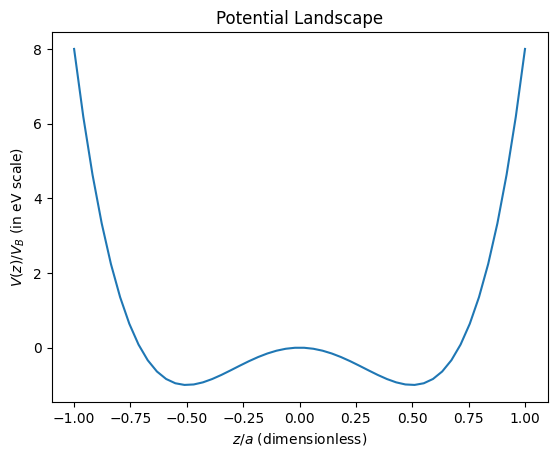

In [6]:
plt.plot(a_discrete/a, potential_array/e_0)
plt.ylabel("${V(z)}/{V_B}$ (in eV scale)")
plt.xlabel("$z/a$ (dimensionless)")
plt.title("Potential Landscape")

# a). Stationary Wave Function (2 Lowest Energy States)

In [7]:
delta_z = (a_discrete[1] - a_discrete[0])*(10**(-9)) # in SI

delta_z

4.081632653061229e-11

In [8]:
c = (hbar**2) / (2*m_eff*(delta_z**2))
c

3.664086611123535e-18

In [9]:
def disc_H_matrix(V):
    H = np.zeros((N,N))

    for i in range(N):
        for j in range(N):
            if i == j:
                H[i,j] = 2*c + V[i]

                if i != 0:
                    H[i-1, j] = -c
                if i != (N-1):
                    H[i+1, j] = -c

    return H

In [10]:
discretized_hamiltonian_matrix = disc_H_matrix(potential_array)
pd.DataFrame(discretized_hamiltonian_matrix)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,8.609915e-18,-3.664087e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,-3.664087e-18,8.318818e-18,-3.664087e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,-3.664087e-18,8.070614e-18,-3.664087e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,-3.664087e-18,7.861377e-18,-3.664087e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,-3.664087e-18,7.687349e-18,-3.664087e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.664087e-18,7.544945e-18,-3.664087e-18,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.664087e-18,7.430750e-18,-3.664087e-18,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.664087e-18,7.341519e-18,-3.664087e-18,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.664087e-18,7.274179e-18,-3.664087e-18,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.664087e-18,7.225826e-18,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


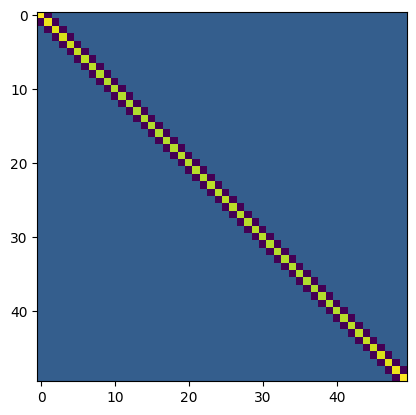

In [11]:
plt.imshow(discretized_hamiltonian_matrix)

In [12]:
eigvals, eigvecs = np.linalg.eig(discretized_hamiltonian_matrix)
eigvals.shape, eigvecs.shape

((50,), (50, 50))

In [13]:
# the two lowest eigenvalues

E_1, E_2 = eigvals[np.argsort(eigvals)[:2]]
E_1, E_2

(-6.298372329288984e-20, -3.6740620244714777e-20)

In [14]:
Psi_1 = eigvecs[:, np.argsort(eigvals)[0]]
Psi_2 = eigvecs[:, np.argsort(eigvals)[1]]

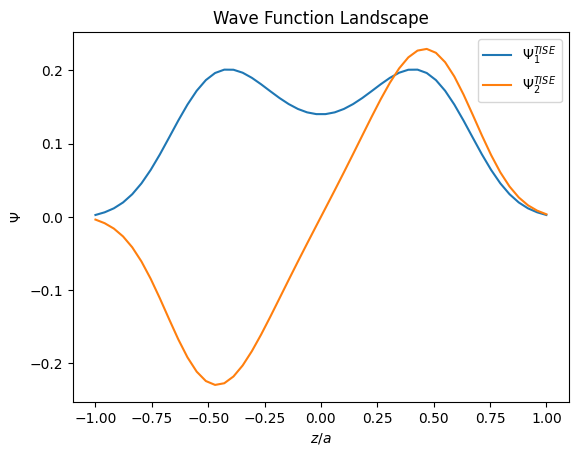

In [19]:
plt.plot(a_discrete/a, Psi_1, label="$\Psi_1^{TISE}$")
plt.plot(a_discrete/a, Psi_2, label="$\Psi_2^{TISE}$")
#plt.plot(a_discrete, potential_array, label="$V(z)/V_B$")

plt.ylabel("$\Psi$")
plt.xlabel("$z/a$")
plt.title("Wave Function Landscape")
plt.legend()

plt.show()

### Initial Time-Independent Superposition State

$$
\Psi^{1/2} = \frac{\Psi_1^{TISE} + \Psi_2^{TISE}}{\sqrt{2}}
$$

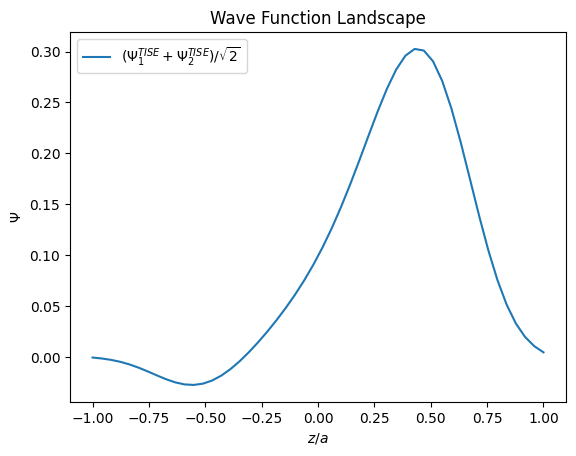

In [20]:
Psi_init_superposition = (Psi_1 + Psi_2)/np.sqrt(2)

plt.plot(a_discrete, Psi_init_superposition, label="$(\Psi_1^{TISE} + \Psi_2^{TISE})/\sqrt{2}$")

plt.ylabel("$\Psi$")
plt.xlabel("$z/a$")
plt.title("Wave Function Landscape")
plt.legend()

plt.show()

# b). Time-dependent Wave Function Evolution (with the Leapfrog method)

### Leapfrog Method

$$
\text{Initial Condition of the Wave Function}\\
\Psi^{1/2} = \frac{\Psi_1^{TISE} + \Psi_2^{TISE}}{\sqrt{2}}\\
\Psi^0=\Psi^{1 / 2}+\mathrm{i} \frac{\Delta_t}{2 \hbar}\left(\mathbf{H}^{1 / 2} \Psi^{1 / 2}-\mathbf{b}^{1 / 2}\right), \quad \Psi^1=\Psi^{1 / 2}-\mathrm{i} \frac{\Delta_t}{2 \hbar}\left(\mathbf{H}^{1 / 2} \Psi^{1 / 2}-\mathbf{b}^{1 / 2}\right)\\
t_{0,1}=t_{1 / 2} \mp \Delta_t / 2 → t_{1/2} = \Delta_t/2\\
$$

$$
\text{Wave Function Evolution Equation}\\
\Psi^{n+1} = \Psi^{n-1} - 2i\frac{\Delta_t}{\hbar}(\mathbf{H}^{n}\Psi^{n} - \mathbf{b}^{n})
$$

$$
\mathbf{b}=\mathbf{0} \text{ for bound states with numerical boundaries sufficiently far apart.}
$$

### von Neumann stability analysis for Leapfrog method

$$
\text{Sufficiently small time discretization for a conditionally stable simulation:}\\
\Delta_t \leq \frac{\hbar}{|E|_{max}} \rightarrow \Delta_t \approx \frac{1}{4}\frac{\hbar}{|E|_{max}}\\
|E|_{\max }=\max \left\{\left|\min \left\{V_j^n\right\}\right|,\left|\max \left\{V_j^n\right\}+4 \frac{\hbar^2}{m^* \Delta_z^2}\right|\right\}\\
\text{Time-dependent potential function}\\
V(z, t)=V(z)-e_0 E z \sin (\omega t) → \min \left\{V_j^n\right\} = \min \left\{V(z)-e_0 E\right\} \text{ and } \max \left\{V_j^n\right\} = \max \left\{V(z)+e_0 E\right\}\\
|E|_{\max }=\max \left\{\left|\min \left\{V(z)\right\}-e_0 E\right|,\left| \max \left\{V(z)\right\}+ e_0 E + 4 \frac{\hbar^2}{m^* \Delta_z^2}\right|\right\}
$$

In [21]:
def leapfrog(V_array_time, psi_0, psi_1, t_start, t_end, delta_t):

    Psi_t = [psi_0, psi_1]
    Psi_t_plot = [psi_0]  # for plotting purposes, only plot every 1 fs interval

    n = 1 # start from time step n = 1 to calculate the psi_n_plus_1 = psi_2
    t = n*delta_t
    psi_n_min_1 = psi_0
    psi_n = psi_1

    n_plot = int(np.round(1e-15/delta_t)) # time step to save the psi for plotting purposes

    while t <= t_end:
        H_n = disc_H_matrix(V_array_time[n])  # H^n
        psi_n_plus_1 =  psi_n_min_1 - (2*1j*delta_t/hbar)*(H_n @ psi_n) # Leapfrog method update equation
        Psi_t += [psi_n_plus_1] # save the psi
        if (n+1)%n_plot == 0:
            Psi_t_plot += [psi_n_plus_1]  # save the psi for plotting in the interval of 1 fs

        # Update variable for the next time step iteration
        psi_n_min_1 = psi_n
        psi_n = psi_n_plus_1
        n += 1
        t = n*delta_t

    return Psi_t, Psi_t_plot

In [22]:
def stable_delta_t_calc(E):
    E_abs_max = max(abs(np.min(potential_array) - e_0*E), abs(np.max(potential_array) + e_0*E + 4*(hbar**2)/(m_eff*(delta_z**2))))
    delta_t = 0.25 * hbar / E_abs_max
    return delta_t

### Time-dependent Potential Function

$$
V(z, t)=V(z)-e_0 E z \sin (\omega t)
$$

In [23]:
# in SI
def v_t(v, t_start, t_end, omega, E, delta_t):

    potential_array_time = []
    t = t_start

    while t <= t_end:
      potential_array_time += [np.array([(v(z) - e_0*E*z*(1e-9)*np.sin(omega*t)) for z in a_discrete])] # in SI
      t += delta_t

    return potential_array_time

# c). Simulation for E = 0 (stationary potential) over a time interval of 100 fs

- This is equivalent to simulating a separable Schrödinger equation.
- The temporal wave function can be separated from the spatial wave function.
- The time evolution comes from the temporal part of the wave function.

### Choosing appropriate time step size $\Delta_t$ with von Neumann stability analysis

In [24]:
E = 0 # in SI
omega = 1 # doesn't matter since E = 0
t_start = 0 # in SI
t_end = 100*1e-15 # in SI

delta_t_ideal = stable_delta_t_calc(E)
print("Ideal time step size:", delta_t_ideal)
print("Total time step grid with ideal time step size:", (1 + (t_end-t_start)/delta_t_ideal))

Ideal time step size: 8.617351632856358e-19
Total time step grid with ideal time step size: 116045.9338271385


In [25]:
delta_t = delta_t_ideal
print("Total time step grid:", (1 + (t_end-t_start)/delta_t))

potential_array_time = v_t(v, t_start, t_end, omega, E, delta_t)
len(potential_array_time)

Total time step grid: 116045.9338271385


116045

In [26]:
potential_array_time_plot = [potential_array_time[0]]

for i in range(len(potential_array_time)):
    if i%int(np.round(1e-15/delta_t)) == 0:
        potential_array_time_plot += [potential_array_time[i]]

In [27]:
import matplotlib.animation
from IPython import display

fig = plt.figure(figsize=(10, 8))

# syntax for 3-D projection
ax = plt.axes()
ax.set_title('Potential Landscape $V$ with $E=0$ V/m (Stationary Potential) Over a Time Interval of 100 fs')
ax.set_xlabel('z/a')
ax.set_ylabel('V (in eV)')

# Set each axis limits
ax.set_xlim([-1, 1])
ax.set_ylim([-3, 10])

l, = ax.plot([], [])

def animate(i):
    # defining all 3 axis
    x = a_discrete  # spatial axis
    y = potential_array_time_plot[i]/e_0 # potential

    l.set_data(x, y)


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(potential_array_time_plot))

# converting to an html5 video
video = ani.to_html5_video()

# embedding for the video
html = display.HTML(video)

# draw the animation
display.display(html)
plt.close()

#from IPython.display import HTML
#HTML(ani.to_jshtml())

### Finding the initial condition of Psi^0 and Psi^1 with b = 0 (bound state)

In [28]:
t_half = delta_t/2
potential_array_half = np.array([(v(z) - e_0*E*z*(1e-9)*np.sin(omega*t_half)) for z in a_discrete]) # in SI

hamiltonian_half = disc_H_matrix(potential_array_half)
Psi_half = Psi_init_superposition

Psi_0_leapfrog = Psi_half + (1j*delta_t/(2*hbar)) * (hamiltonian_half @ Psi_half)
Psi_1_leapfrog = Psi_half - (1j*delta_t/(2*hbar)) * (hamiltonian_half @ Psi_half)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


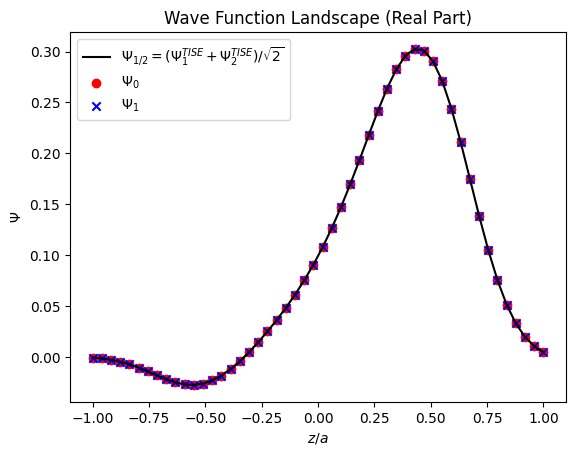

In [29]:
plt.plot(a_discrete, Psi_init_superposition, label="$\Psi_{1/2} = (\Psi_1^{TISE} + \Psi_2^{TISE})/\sqrt{2}$", color='black')
plt.scatter(a_discrete, Psi_0_leapfrog, label="$\Psi_0$", marker='o', color='red')
plt.scatter(a_discrete, Psi_1_leapfrog, label="$\Psi_1$", marker='x', color='blue')

plt.ylabel("$\Psi$")
plt.xlabel("$z/a$")
plt.title("Wave Function Landscape (Real Part)")
plt.legend()

plt.show()

### Time evolution with Leapfrog method

In [30]:
Psi_t, Psi_t_plot = leapfrog(potential_array_time, Psi_0_leapfrog, Psi_1_leapfrog, t_start, t_end, delta_t)
len(Psi_t), len(Psi_t_plot)

(116046, 101)

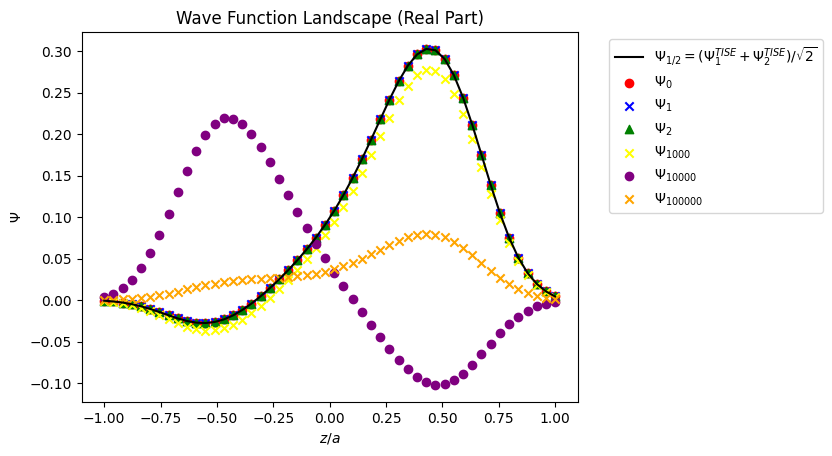

In [38]:
plt.plot(a_discrete, Psi_init_superposition, label="$\Psi_{1/2} = (\Psi_1^{TISE} + \Psi_2^{TISE})/\sqrt{2}$", color='black')
plt.scatter(a_discrete, Psi_0_leapfrog, label="$\Psi_0$", marker='o', color='red')
plt.scatter(a_discrete, Psi_1_leapfrog, label="$\Psi_1$", marker='x', color='blue')
plt.scatter(a_discrete, Psi_t[2], label="$\Psi_2$", marker='^', color='green')
plt.scatter(a_discrete, Psi_t[1000], label="$\Psi_{1000}$", marker='x', color='yellow')
plt.scatter(a_discrete, Psi_t[10000], label="$\Psi_{10000}$", marker='o', color='purple')
plt.scatter(a_discrete, Psi_t[100000], label="$\Psi_{100000}$", marker='x', color='orange')

plt.ylabel("$\Psi$")
plt.xlabel("$z/a$")
plt.title("Wave Function Landscape (Real Part)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [40]:
import matplotlib.animation
from IPython import display

fig = plt.figure(figsize=(10, 8))

# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.set_title('Time Evolution of $\Psi$ with $E=0$ (Stationary Potential) Over a Time Interval of 100 fs')
ax.set_xlabel('z/a')
ax.set_ylabel('Re($\Psi$)')
ax.set_zlabel('Im($\Psi$)')

# Set each axis limits
ax.set_xlim([-1, 1])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([-0.5, 0.5])

l, = ax.plot3D([], [], [])

def animate(i):
    # defining all 3 axis
    x = a_discrete  # spatial axis
    y = np.real(Psi_t_plot[i]) # real part of the wave function
    z = np.imag(Psi_t_plot[i]) # imaginary part of the wave function

    l.set_data_3d(x, y, z)


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(Psi_t_plot))

# converting to an html5 video
video = ani.to_html5_video()

# embedding for the video
html = display.HTML(video)

# draw the animation
display.display(html)
plt.close()

#from IPython.display import HTML
#HTML(ani.to_jshtml())

# d). Simulation for $E = 10^9$ V/m and $\omega = 2\pi \times 10^{14}$ Hz over a time interval of 100 fs

- Since now the potential is also a function of time, this Schrödinger equation is non-separable. The wave function cannot be separated between its spatial and temporal components.

### Choosing appropriate time step size $\Delta_t$ with von Neumann stability analysis

In [41]:
E = 1e9 # in SI
omega = 2*np.pi*1e14  # in SI
t_start = 0 # in SI
t_end = 100*1e-15 # in SI

delta_t_ideal = stable_delta_t_calc(E)
print("Ideal time step size:", delta_t_ideal)
print("Total time step grid with ideal time step size:", (1 + (t_end-t_start)/delta_t_ideal))

Ideal time step size: 1.6455294867917587e-25
Total time step grid with ideal time step size: 607707128938.3678


In [42]:
delta_t = 1e-19
print("Total time step grid:", (1 + (t_end-t_start)/delta_t))

potential_array_time = v_t(v, t_start, t_end, omega, E, delta_t)
len(potential_array_time)

Total time step grid: 1000001.0


1000001

In [43]:
potential_array_time_plot = [potential_array_time[0]]

for i in range(len(potential_array_time)):
    if i%int(np.round(1e-15/delta_t)) == 0:
        potential_array_time_plot += [potential_array_time[i]]

In [44]:
import matplotlib.animation
from IPython import display

fig = plt.figure(figsize=(10, 8))

# syntax for 3-D projection
ax = plt.axes()
ax.set_title('Potential Landscape $V$ with $E=10^9$ V/m and $\omega=2\pi × 10^{14}$ Hz Over a Time Interval of 100 fs')
ax.set_xlabel('z/a')
ax.set_ylabel('V (in eV)')

# Set each axis limits
ax.set_xlim([-1, 1])
ax.set_ylim([-3, 10])

l, = ax.plot([], [])

def animate(i):
    # defining all 3 axis
    x = a_discrete  # spatial axis
    y = potential_array_time_plot[i]/e_0 # potential

    l.set_data(x, y)


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(potential_array_time_plot))

# converting to an html5 video
video = ani.to_html5_video()

# embedding for the video
html = display.HTML(video)

# draw the animation
display.display(html)
plt.close()

#from IPython.display import HTML
#HTML(ani.to_jshtml())

### Finding the initial condition of Psi^0 and Psi^1 with b = 0 (bound state)

In [45]:
t_half = delta_t/2
potential_array_half = np.array([(v(z) - e_0*E*z*(1e-9)*np.sin(omega*t_half)) for z in a_discrete]) # in SI

hamiltonian_half = disc_H_matrix(potential_array_half)
Psi_half = Psi_init_superposition

Psi_0_leapfrog = Psi_half + (1j*delta_t/(2*hbar)) * (hamiltonian_half @ Psi_half)
Psi_1_leapfrog = Psi_half - (1j*delta_t/(2*hbar)) * (hamiltonian_half @ Psi_half)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


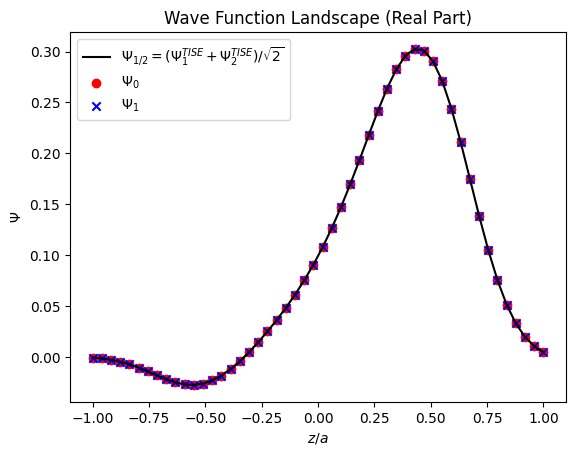

In [46]:
plt.plot(a_discrete, Psi_init_superposition, label="$\Psi_{1/2} = (\Psi_1^{TISE} + \Psi_2^{TISE})/\sqrt{2}$", color='black')
plt.scatter(a_discrete, Psi_0_leapfrog, label="$\Psi_0$", marker='o', color='red')
plt.scatter(a_discrete, Psi_1_leapfrog, label="$\Psi_1$", marker='x', color='blue')

plt.ylabel("$\Psi$")
plt.xlabel("$z/a$")
plt.title("Wave Function Landscape (Real Part)")
plt.legend()

plt.show()

### Time evolution with Leapfrog method

In [47]:
Psi_t, Psi_t_plot = leapfrog(potential_array_time, Psi_0_leapfrog, Psi_1_leapfrog, t_start, t_end, delta_t)
len(Psi_t), len(Psi_t_plot)

(1000002, 101)

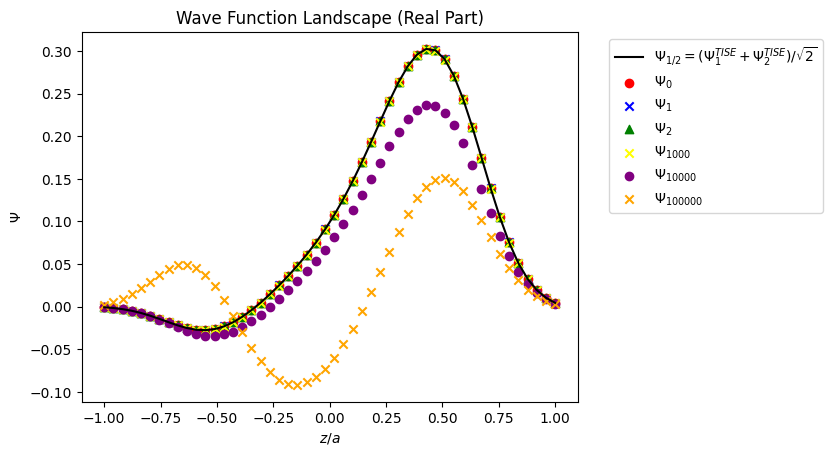

In [48]:
plt.plot(a_discrete, Psi_init_superposition, label="$\Psi_{1/2} = (\Psi_1^{TISE} + \Psi_2^{TISE})/\sqrt{2}$", color='black')
plt.scatter(a_discrete, Psi_0_leapfrog, label="$\Psi_0$", marker='o', color='red')
plt.scatter(a_discrete, Psi_1_leapfrog, label="$\Psi_1$", marker='x', color='blue')
plt.scatter(a_discrete, Psi_t[2], label="$\Psi_2$", marker='^', color='green')
plt.scatter(a_discrete, Psi_t[1000], label="$\Psi_{1000}$", marker='x', color='yellow')
plt.scatter(a_discrete, Psi_t[10000], label="$\Psi_{10000}$", marker='o', color='purple')
plt.scatter(a_discrete, Psi_t[100000], label="$\Psi_{100000}$", marker='x', color='orange')

plt.ylabel("$\Psi$")
plt.xlabel("$z/a$")
plt.title("Wave Function Landscape (Real Part)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [49]:
import matplotlib.animation
from IPython import display

fig = plt.figure(figsize=(10, 8))

# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.set_title('Time Evolution of $\Psi$ with $E=10^9$ V/m and $\omega=2\pi × 10^{14}$ Hz Over a Time Interval of 100 fs')
ax.set_xlabel('z/a')
ax.set_ylabel('Re($\Psi$)')
ax.set_zlabel('Im($\Psi$)')

# Set each axis limits
ax.set_xlim([-1, 1])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([-0.5, 0.5])

l, = ax.plot3D([], [], [])

def animate(i):
    # defining all 3 axis
    x = a_discrete  # spatial axis
    y = np.real(Psi_t_plot[i]) # real part of the wave function
    z = np.imag(Psi_t_plot[i]) # imaginary part of the wave function

    l.set_data_3d(x, y, z)


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(Psi_t_plot))

# converting to an html5 video
video = ani.to_html5_video()

# embedding for the video
html = display.HTML(video)

# draw the animation
display.display(html)
plt.close()

#from IPython.display import HTML
#HTML(ani.to_jshtml())